# Introduction

Within the current US presidential campaign the public relations and marketing firm was employed by the US democratic party to help developing a communication strategy for the democrats political campaign. Given that nowadays online communication is a very important public sphere one of the goals of this company is to trace what kind of tweets draw more attention of online audience/potential voters and therefore get more retweets than others. 

   Some scholars contend that the modern politics is now deeply intertwined with popular culture that causes the intervention of emotionality in the political sphere. In other words, it means that people seek certain kinds of emotionalized experience from politics that they used to obtain from the popular culture only (Richards, 2004). In this light, sentiments are the important factor that should be analyzed and taken into consideration while developing and running the election campaign. 

Therefore, the company established emotionality as an important criterion for analyzing the tweets about the democrats. Political advertising is one of the areas where people's emotions and its role in communication is being scrutinized in the academic circles as well as among PR practitioners especially prior the US presidential election, therefore, the following research question is of high academic and societal relevance:
   
   To what extent does the negative tone of the tweets about democrats increase amount of retweets compared to positive tone?


# Hypothesis

With regards to the audience reaction to the tone of the information there is an increasing array of articles in political science and psychology that suggests that the effect of increase in negativity of the message has greater influence over the recipient’s perception than the increase in positivity of the same amplitude. In psychology literature on impression formation researchers revealed that unfavorable information has a greater impact on impressions than does favorable information in very different life situations (Singh and Teoh 2000).

This tenet of psychologists was supported by the scholars that examined the role of the news sentiments over readers’ perception (Soroka, 2006; Damstra & Boukes, 2018) especially while reading economic journalistic features (Tetlock, 2007). Such asymmetric responsiveness could be explained by the fact that people care more strongly about a potential loss (including financial loss) than they do about a gain of the same value (Kahneman & Tversky, 1979).

Meanwhile asymmetry in responses to negative versus positive information was also revealed in the political domain by the researchers. There is evidence that negative information plays a greater role in voting behaviour and, more specifically, that U.S. presidents were tremendously punished by the electorate for negative economic trends but gained lesser electoral benefits from positive trends (Nannestad and Paldam, 1997). 'Asymmetries have also been identified in the formation of more general impressions of U.S. presidential candidates and parties and negativity was found to have a greater effect on voters impression than positivity' according to Niven (2000).

To sum it up, the tendency of assymetric response to negative and positive information were found not in psychological scholarship, but also in the literature on politics. Deploying academic findings mentioned above for our examining case, the company hypothesizes the following:

H1: Negative tweets about the democrats get more retweets than positive tweets.

Based on the literature the following key concept is going to be used in this work:

Influence of tweets sentiment over Twitter users’ behavior ‒ the effect of tone of the tweets over the decision of the readers to retweet such information. 


# Gathering Data

The data was collected by requesting the collection of the tweets using the following key words: 'democrat', 'democrats', 'Democrat', 'Democrats'. Such query would enable the company to analyze tweets about democrats ('GalinaBorisova_export.pkl'). 

After the tweets were gathered the sentiment analysis (using SentiStrength) was requested and performed to identify positive/negative and neutral sentiments in each tweet ('GalinaBorisova_EN.pkl'). Such emotions were detected per article, however, to identify the overall sentiment of the tweets we created the corresponding column by summarizing positive and negative sentiments (see the 'Data Cleaning' section of the current work below).

The third file with the retweets on the initial tweeter file were requested and obtained to analyze which tweets about democrats drew more attention from the audience ('GalinaBorisova_retweets.pkl'). The retweets file was created using the automated script, that getting the number of tweets that have been retweeted.

Overall, the three mentioned datasets were established as necessary to answer the research question.


Loading the datasets in Pandas.

In [942]:
import pandas as pd
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm

In [943]:
sentiment=pd.read_pickle('GalinaBorisova_EN.pkl')
retweets=pd.read_pickle('GalinaBorisova_retweets.pkl')
tweets=pd.read_pickle('GalinaBorisova_export.pkl')

# Merging the datasets 

To merge the three files let's first inspect the lenghts, the columns and datatypes they contain. To successfully merge the datasets we have to make sure that:

1.They have the common column(s) with exactly the same names, that we can merge on.

2.This indentified column(s) has the same datatype in all datasets.

In [944]:
len(tweets), len(retweets), len(sentiment)

(89503, 9020, 89503)

Let's take a closer look at the sentiment and tweets files. 

In [945]:
tweets.columns

Index(['id', 'created_at', 'from_user_name', 'from_user_id', 'from_user_lang',
       'from_user_tweetcount', 'from_user_followercount',
       'from_user_friendcount', 'from_user_listed', 'from_user_realname',
       'from_user_utcoffset', 'from_user_timezone', 'from_user_description',
       'from_user_url', 'from_user_verified', 'from_user_profile_image_url',
       'from_user_created_at', 'from_user_withheld_scope',
       'from_user_favourites_count', 'source', 'location', 'geo_lat',
       'geo_lng', 'text', 'retweet_id', 'retweet_count', 'favorite_count',
       'to_user_id', 'to_user_name', 'in_reply_to_status_id', 'filter_level',
       'lang', 'possibly_sensitive', 'quoted_status_id', 'withheld_copyright',
       'withheld_scope'],
      dtype='object')

In [681]:
sentiment.columns

Index(['id', 'created_at', 'from_user_name', 'from_user_id', 'from_user_lang',
       'from_user_tweetcount', 'from_user_followercount',
       'from_user_friendcount', 'from_user_listed', 'from_user_realname',
       'from_user_utcoffset', 'from_user_timezone', 'from_user_description',
       'from_user_url', 'from_user_verified', 'from_user_profile_image_url',
       'from_user_created_at', 'from_user_withheld_scope',
       'from_user_favourites_count', 'source', 'location', 'geo_lat',
       'geo_lng', 'text', 'retweet_id', 'retweet_count', 'favorite_count',
       'to_user_id', 'to_user_name', 'in_reply_to_status_id', 'filter_level',
       'lang', 'possibly_sensitive', 'quoted_status_id', 'withheld_copyright',
       'withheld_scope', 'negative', 'positive', 'neutral'],
      dtype='object')

Both files have a column 'lang' (language). Since the company work with the US politicians we are interested in English language only. However, let's inspect this column first.

In [946]:
sentiment['lang'].value_counts()

en     89103
ja       135
und       73
th        66
es        38
fr        36
ca        12
ro         7
tl         7
de         5
nl         3
in         3
cs         2
pt         2
cy         2
fi         1
hu         1
sv         1
it         1
et         1
tr         1
ht         1
da         1
zh         1
Name: lang, dtype: int64

In [683]:
tweets['lang'].value_counts()

en     89103
ja       135
und       73
th        66
es        38
fr        36
ca        12
ro         7
tl         7
de         5
nl         3
in         3
cs         2
pt         2
cy         2
fi         1
hu         1
sv         1
it         1
et         1
tr         1
ht         1
da         1
zh         1
Name: lang, dtype: int64

This column in both files looks the same. Let's clean it later under the 'Cleaning section'.

In [947]:
len(sentiment)

89503

In [948]:
tweets.dtypes

id                                     object
created_at                     datetime64[ns]
from_user_name                         object
from_user_id                            int64
from_user_lang                         object
from_user_tweetcount                    int64
from_user_followercount                 int64
from_user_friendcount                   int64
from_user_listed                        int64
from_user_realname                     object
from_user_utcoffset                    object
from_user_timezone                     object
from_user_description                  object
from_user_url                          object
from_user_verified                      int64
from_user_profile_image_url            object
from_user_created_at           datetime64[ns]
from_user_withheld_scope               object
from_user_favourites_count              int64
source                                 object
location                               object
geo_lat                           

In [949]:
sentiment.dtypes

id                                     object
created_at                     datetime64[ns]
from_user_name                         object
from_user_id                            int64
from_user_lang                         object
from_user_tweetcount                    int64
from_user_followercount                 int64
from_user_friendcount                   int64
from_user_listed                        int64
from_user_realname                     object
from_user_utcoffset                    object
from_user_timezone                     object
from_user_description                  object
from_user_url                          object
from_user_verified                      int64
from_user_profile_image_url            object
from_user_created_at           datetime64[ns]
from_user_withheld_scope               object
from_user_favourites_count              int64
source                                 object
location                               object
geo_lat                           

In [950]:
retweets.dtypes

retweet_id        object
retweets_total     int64
dtype: object

The 'id' column apperaed in all three datasets, datatype — object. However, we see, that we have to change the name of the column in 'retweets' — from 'retweet_id' to 'id' for the further merging. Let's do it now.

In [951]:
retweets = retweets.rename(columns={'retweet_id': 'id'})

Let's see how it worked.

In [733]:
len(retweets)

9020

In [952]:
retweets

,id,retweets_total
1,1013461206240251904,1
2,1014215384860372992,2
3,1023617258181021696,1
4,1023628624514232320,1
5,1023934222044680192,1
...,...,...
9016,960486144818450432,1
9017,965435337425276928,2
9018,971733053629521920,6
9019,997808444605333507,1


And just in case check how tweets and sentiment look like, since they already seem quite similar.

In [953]:
tweets.head()

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,favorite_count,to_user_id,to_user_name,in_reply_to_status_id,filter_level,lang,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope
0,1238382160110931968,2020-03-13 08:31:29,SmurfigaMalin,823119222700175360,None,517,5,55,0,Malin Dahlqvist,...,0,823119222700175360.000,SmurfigaMalin,1238382158487736320.000,low,en,nan,nan,None,None
1,1238382164812673026,2020-03-13 08:31:30,sjrlady,954691474662281218,None,39873,2725,3638,0,Susan,...,0,nan,None,nan,low,en,nan,nan,None,None
2,1238382303207927809,2020-03-13 08:32:03,crysthecat,973870141,None,23625,109,397,17,Crystal 🌛🌝🌜,...,0,nan,None,nan,low,en,nan,nan,None,None
3,1238382315518283776,2020-03-13 08:32:06,BenSnow57,30200985,None,40547,420,834,13,Ben Snow,...,0,462104542.000,chuckwoolery,1238195247190085632.000,low,und,nan,nan,None,None
4,1238382340805513216,2020-03-13 08:32:12,brooksby_harman,821961207217156096,None,8121,336,1276,0,Brooksby Harman,...,0,nan,None,nan,low,en,nan,nan,None,None


In [198]:
sentiment.head()

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,in_reply_to_status_id,filter_level,lang,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope,negative,positive,neutral
0,1238382160110931968,2020-03-13 08:31:29,SmurfigaMalin,823119222700175360,None,517,5,55,0,Malin Dahlqvist,...,1238382158487736320.000,low,en,nan,nan,None,None,-4,1,-1
1,1238382164812673026,2020-03-13 08:31:30,sjrlady,954691474662281218,None,39873,2725,3638,0,Susan,...,nan,low,en,nan,nan,None,None,-4,2,-1
2,1238382303207927809,2020-03-13 08:32:03,crysthecat,973870141,None,23625,109,397,17,Crystal 🌛🌝🌜,...,nan,low,en,nan,nan,None,None,-1,1,0
3,1238382315518283776,2020-03-13 08:32:06,BenSnow57,30200985,None,40547,420,834,13,Ben Snow,...,1238195247190085632.000,low,und,nan,nan,None,None,-1,1,0
4,1238382340805513216,2020-03-13 08:32:12,brooksby_harman,821961207217156096,None,8121,336,1276,0,Brooksby Harman,...,nan,low,en,nan,nan,None,None,-2,1,-1


From what we have seen so far we can infer that 'sentiment' file has the similar lenght and columns as the 'tweeter' file plus additional three columns with sentiments of the tweets, the most important among which are also 'id' and 'text', therefore we will merge only 'sentiment' file with the 'retweets' file a bit later.  

However, before doing so we will drop the column 'retweet_id' and 'retweet_count' in the 'sentiment' file as this information could be confusing and unnecessary in the future analysis of the retweets from the 'retweets' file.

In [954]:
sentiment=sentiment.drop(columns=['retweet_id'])

In [955]:
sentiment=sentiment.drop(columns=['retweet_count'])

Let's check if it worked and the file still has the same lenght.

In [956]:
sentiment.columns

Index(['id', 'created_at', 'from_user_name', 'from_user_id', 'from_user_lang',
       'from_user_tweetcount', 'from_user_followercount',
       'from_user_friendcount', 'from_user_listed', 'from_user_realname',
       'from_user_utcoffset', 'from_user_timezone', 'from_user_description',
       'from_user_url', 'from_user_verified', 'from_user_profile_image_url',
       'from_user_created_at', 'from_user_withheld_scope',
       'from_user_favourites_count', 'source', 'location', 'geo_lat',
       'geo_lng', 'text', 'favorite_count', 'to_user_id', 'to_user_name',
       'in_reply_to_status_id', 'filter_level', 'lang', 'possibly_sensitive',
       'quoted_status_id', 'withheld_copyright', 'withheld_scope', 'negative',
       'positive', 'neutral'],
      dtype='object')

In [894]:
len(sentiment)

89503

Now it's time to merge the two datasets. We are merging sentiment and retweets files on the left since we are most and foremost interested in the retweets that were retweeted.

In [958]:
merged=sentiment.merge(retweets,on='id', how='left')

In [959]:
merged

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,filter_level,lang,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope,negative,positive,neutral,retweets_total
0,1238382160110931968,2020-03-13 08:31:29,SmurfigaMalin,823119222700175360,None,517,5,55,0,Malin Dahlqvist,...,low,en,nan,nan,None,None,-4,1,-1,nan
1,1238382164812673026,2020-03-13 08:31:30,sjrlady,954691474662281218,None,39873,2725,3638,0,Susan,...,low,en,nan,nan,None,None,-4,2,-1,nan
2,1238382303207927809,2020-03-13 08:32:03,crysthecat,973870141,None,23625,109,397,17,Crystal 🌛🌝🌜,...,low,en,nan,nan,None,None,-1,1,0,nan
3,1238382315518283776,2020-03-13 08:32:06,BenSnow57,30200985,None,40547,420,834,13,Ben Snow,...,low,und,nan,nan,None,None,-1,1,0,nan
4,1238382340805513216,2020-03-13 08:32:12,brooksby_harman,821961207217156096,None,8121,336,1276,0,Brooksby Harman,...,low,en,nan,nan,None,None,-2,1,-1,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89498,1239142747317186560,2020-03-15 10:53:47,DavidZi81001864,1145325001878450176,None,14834,1823,2384,0,David A Ziegler,...,low,en,nan,nan,None,None,-3,2,-1,nan
89499,1239142768599019521,2020-03-15 10:53:52,MFavregas,1215424103982694401,None,4171,1507,1801,0,marilyn Favregas,...,low,en,nan,nan,None,None,-4,2,-1,nan
89500,1239142776664731648,2020-03-15 10:53:54,sharonramsey2,482915852,None,178,5,6,0,sharon ramsey,...,low,en,nan,nan,None,None,-5,2,-1,nan
89501,1239142827000393728,2020-03-15 10:54:06,VivianM61425009,1039555122316042241,None,39405,3323,4264,6,Viv Martinez🌟🌟🌟,...,low,en,nan,nan,None,None,-4,2,-1,nan


At the first glance it seems that the merge worked, but let's explore the data further in the next section.

In [960]:
merged.columns

Index(['id', 'created_at', 'from_user_name', 'from_user_id', 'from_user_lang',
       'from_user_tweetcount', 'from_user_followercount',
       'from_user_friendcount', 'from_user_listed', 'from_user_realname',
       'from_user_utcoffset', 'from_user_timezone', 'from_user_description',
       'from_user_url', 'from_user_verified', 'from_user_profile_image_url',
       'from_user_created_at', 'from_user_withheld_scope',
       'from_user_favourites_count', 'source', 'location', 'geo_lat',
       'geo_lng', 'text', 'favorite_count', 'to_user_id', 'to_user_name',
       'in_reply_to_status_id', 'filter_level', 'lang', 'possibly_sensitive',
       'quoted_status_id', 'withheld_copyright', 'withheld_scope', 'negative',
       'positive', 'neutral', 'retweets_total'],
      dtype='object')

# Data Cleaning

We need to inspect the variables that will be used in the analysis for missing cases and data corruption. We also need to create  an 'overall sentiment' column discussed above.

Let's first clean the 'lang' column that appeared in the previous section to have other than English languages. We are going to use only English language for our analysis that fits the setup of our business challenge.

In [961]:
merged = merged[sentiment['lang']=='en']

In [798]:
len(merged)

89103

It obviously made our dataset smaller.

A good idea would be also to select only those columns that we are going to work with adn create a new data frame, so that would be very clear for us, without any excess information. Let's take a look at the columns we have now to choose those that we would like to work with. We eould also like to underline that 'from_user_friendcount' seems interesting and could be used in the future for the modelling.

In [962]:
merged.columns

Index(['id', 'created_at', 'from_user_name', 'from_user_id', 'from_user_lang',
       'from_user_tweetcount', 'from_user_followercount',
       'from_user_friendcount', 'from_user_listed', 'from_user_realname',
       'from_user_utcoffset', 'from_user_timezone', 'from_user_description',
       'from_user_url', 'from_user_verified', 'from_user_profile_image_url',
       'from_user_created_at', 'from_user_withheld_scope',
       'from_user_favourites_count', 'source', 'location', 'geo_lat',
       'geo_lng', 'text', 'favorite_count', 'to_user_id', 'to_user_name',
       'in_reply_to_status_id', 'filter_level', 'lang', 'possibly_sensitive',
       'quoted_status_id', 'withheld_copyright', 'withheld_scope', 'negative',
       'positive', 'neutral', 'retweets_total'],
      dtype='object')

In [964]:
merged=pd.DataFrame(merged[['id', 'text','from_user_friendcount', 'negative', 'positive', 'neutral','retweets_total']])

Let's check ir the new file has  the same lenght.

In [965]:
len(merged)

89103

Good.

Checking the missing values in the important for us variables ('id', 'negative','neutral', 'positive', 'retweets_total').

In [801]:
merged.isna().sum()

id                    0
text                  0
negative              0
positive              0
neutral               0
retweets_total    88363
dtype: int64

After merging the files retweets got a lot of missing values, that initially were not there (see the code below).

In [901]:
retweets.isna().sum()

id                0
retweets_total    0
dtype: int64

Let's see how many tweets out of 9020 initial left.

In [966]:
merged['retweets_total'].describe().transpose()

count    740.000
mean       7.612
std       47.113
min        1.000
25%        1.000
50%        1.000
75%        3.000
max     1120.000
Name: retweets_total, dtype: float64

Let's think about the reason and check how many common ids both files (sentiment and retweets) have.

In [967]:
commons = sentiment.id.isin(retweets.id)
sum(commons)

747

In [968]:
89103 - 740

88363

Now it makes sense since we see that not all the tweets were retweeted and appeared in the retweets file.

We can see that in the column 'retweets_total' that the minimum number of retweets is 1.000 meaning, that there is no 0 in the data sets. 

This observation enables us to substitute missing values in 'retweets_total' with 0, that could be understood as the absence of retweets. I'd like to underline that we cannot drop them since the amount of retweets is our dependent variables and tweets that got 0 retweets are very important and should be in the dataset.

Let's replace the missing values in 'retweets_total' with 0.


In [969]:
merged['retweets_total'] = merged['retweets_total'].fillna(0)

Checking the missing values again. It should be 0 now.

In [970]:
merged['retweets_total'].isna().sum()

0

Checking if the datatype changed after altering the data.

In [808]:
merged.dtypes

id                 object
text               object
negative           object
positive           object
neutral            object
retweets_total    float64
dtype: object

Let's add the overall sentiment column. We need to change the datatypes of the columns related to the sentiment first.

In [971]:
merged['positive'] = merged['positive'].apply(pd.to_numeric)
merged['negative'] = merged['negative'].apply(pd.to_numeric)
merged['neutral'] = merged['neutral'].apply(pd.to_numeric)

We need to create the 'overall_sentiment' column, because as it could be seen in the sentiment file each tweet simultaneously could have positive and negative sentiments. That implies that during sentiment analysis amount of sentiments (let's simply say the number of positive/negative words) are estimated per tweet. To understand the overall sentiment we need to summarize positive and negative sentiments (words/references).

In [972]:
merged['overall_sentiment'] = merged['positive'] + merged['negative']

In [812]:
merged.isna().sum()

id                   0
text                 0
negative             0
positive             0
neutral              0
retweets_total       0
overall_sentiment    0
dtype: int64

Now we need to identify and remove the tweets that are only retweet events (is_retweet)

In [973]:
def is_rt(text):
    text = text.split()
    if text[0] == 'RT':
        return 1
    return 0

In [974]:
merged['is_retweet'] = merged['text'].apply(is_rt)

In [975]:
merged['is_retweet'].value_counts()

1    72105
0    16998
Name: is_retweet, dtype: int64

We can see that only 16998 tweets in our dataset appear to be unique tweets (statements that were not retweeted), whereas 72105 tweets constitute the retweet events, that we need to get read (see the code below).

In [976]:
merged = merged[merged['is_retweet']==0]

In [977]:
len(merged)

16998

Let's see how the the 'text' colums looks like now (without the retweet events).

In [978]:
merged['text'].value_counts()

@chuckwoolery Democrats                                                                                                                                                                                                                                                                                                         7
Nowadays, there is NO such thing as a GOOD Liberal.There is NO such thing as a GOOD Democrat. There is NO such thing as a GOOD Socialist. There is NO such thing as a GOOD Communist. ALL of the LEFT belong to SATAN/Soros. All of the RIGHT belong to GOD/Jesus. Romans 8\nPLZ RT4ME.                                         7
@CNN &amp; @MSNBC &amp; DEMOCRAT MEDIA is THE VIRUS...                                                                                                                                                                                                                                                                          5
@chuckwoolery Democrats!          

No 'RT' in the data anymore, but we see the retweets, for instance, from CNN, that could be considered as the limitation of our study. 

Let's create the IVs - 'overall_positive', 'overall negative' and 'overall_neutral' since, according to our research question, we are interested if negative tweets lead to more retweets. So, we need to create the binary variables from the continuous 'overall_sentiment'.

In [979]:
merged['overall_negative'] = merged['overall_sentiment'] < 0

In [980]:
merged['overall_positive'] = merged['overall_sentiment'] > 0

In [981]:
merged['overall_neutral'] = merged['overall_sentiment'] == 0

In [834]:
merged['overall_positive'].dtypes

dtype('int32')

In [835]:
merged['overall_positive'].dtypes

dtype('int32')

For the further analysis we need to convert overall_positive, overall_negative and overall_neutral into integer.

In [982]:
merged['overall_positive']=merged.overall_positive.astype(int)

In [983]:
merged['overall_negative']=merged.overall_negative.astype(int)

In [984]:
merged['overall_neutral']=merged.overall_neutral.astype(int)

In [985]:
merged.head(50)

,id,text,from_user_friendcount,negative,positive,neutral,retweets_total,overall_sentiment,is_retweet,overall_negative,overall_positive,overall_neutral
0,1238382160110931968,the top Democrat on the HELP Committee — to co...,55,-4,1,-1,0.000,-3,0,1,0,0
6,1238382374863265792,Mfs always depending on the government to save...,65,-3,2,-1,0.000,-1,0,1,0,0
7,1238382395482611714,41 Democrats in the Senate voted against a bil...,9478,-2,2,-1,0.000,0,0,0,0,1
11,1238382436943159296,@RightWingWatch And suspend rights. Send Democ...,299,-2,1,-1,0.000,-1,0,1,0,0
12,1238382487379861505,@retropianlove @ProudResister We're staying ho...,56,-3,2,-1,0.000,-1,0,1,0,0
17,1238382567360827394,@RepLeeZeldin Don't pay any attention to the F...,1439,-2,1,-1,0.000,-1,0,1,0,0
18,1238382609438212096,@AgiaTheBun @SailorHaumea And that was histori...,521,-2,1,-1,0.000,-1,0,1,0,0
25,1238382789508169730,@2simplyb @Matt_Lagana @AndyOstroy @realDonald...,238,-2,1,-1,0.000,-1,0,1,0,0
45,1238383045524283392,@Hobbit4DJT @VickeySmith10 @Wyn1745 @SpeakerPe...,33,-3,2,-1,0.000,-1,0,1,0,0
49,1238383133487247360,Democrats claim we're all gonna die from COVID...,718,-1,1,0,0.000,0,0,0,0,1


# Data Exploration and Evaluation

It's time to explore and describe all the variables we are using in our analysis to answer the research question. Namely:

IV: 'overall_negative' (binary)

IV: 'overall_positive' (binary)

IV: 'overall_neutral' (binary) - we need this variable for the linear regression model only

DV: 'retweets_total' (continuous)

In [986]:
merged[['retweets_total', 'overall_positive', 'overall_negative', 'overall_neutral']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
retweets_total,16998.000,0.331,9.946,0.000,0.000,0.000,0.000,1120.000
overall_positive,16998.000,0.200,0.400,0.000,0.000,0.000,0.000,1.000
overall_negative,16998.000,0.452,0.498,0.000,0.000,0.000,1.000,1.000
overall_neutral,16998.000,0.348,0.476,0.000,0.000,0.000,1.000,1.000


Analyzing the variables separately we could infer, that retweets_total have some outliers that makes std much higher than the mean and indicates that the nformation is not evenly distributed. 

We could consider removing the outliers, but from the quartiles (25%,50%,75%) we could see that most of the values are 0.

With regards to overall_positive tweets, although the mean value is 0.2, most of them (according to the quartiles) are also 0. There are more overall negative tweets as they have the mean of 0.452.

Now let's take a look at the overall negative and overall positive retweets that got retweetes. 

In [987]:
merged.groupby('overall_negative')['retweets_total'].describe()

,count,mean,std,min,25%,50%,75%,max
overall_negative,,,,,,,,
0,9317.000,0.415,12.967,0.000,0.000,0.000,0.000,1120.000
1,7681.000,0.230,3.866,0.000,0.000,0.000,0.000,264.000


In [988]:
merged.groupby('overall_positive')['retweets_total'].describe()

,count,mean,std,min,25%,50%,75%,max
overall_positive,,,,,,,,
0,13602.000,0.347,10.911,0.000,0.000,0.000,0.000,1120.000
1,3396.000,0.267,4.278,0.000,0.000,0.000,0.000,194.000


In [989]:
merged.groupby('overall_neutral')['retweets_total'].describe()

,count,mean,std,min,25%,50%,75%,max
overall_neutral,,,,,,,,
0,11077.000,0.242,3.996,0.000,0.000,0.000,0.000,264.000
1,5921.000,0.499,15.940,0.000,0.000,0.000,0.000,1120.000


From the grouped descriptive statistics about our dataset we could infer, the retweet rate for positive tweets about the democrats were higher than for negative tweets — 0.267 against 0.230 respectively. However, to state if these results are significant and to test our hypothesis we have to run further analysis that will be performed further.

# Visualizations for all variables used in the study

First let us recall once again the variables we analyze to answer the RQ:

IV: 'overall_negative' (binary)

IV: 'overall_positive' (binary)

IV: 'overall_neutral' (binary) - we need this variable for the linear regression model only

DV: 'retweets_total' (continuous)

So let's make a univariate visualization of each variable.

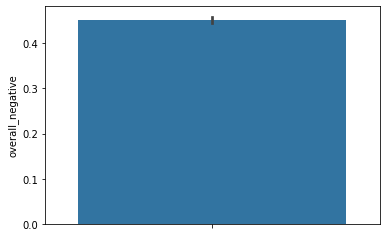

In [990]:
sns.barplot(y=merged['overall_negative'])

From the bart chart above we could infer that the average of overall_negative is roughly around 0.4

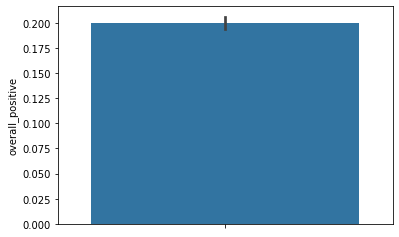

In [991]:
sns.barplot(y=merged['overall_positive'])

Likewise for the overall positive tweets the average is roughly about 0.2, that corresponds to the results of descriptive statistics above.

With regards to the total retweets, given that it's a continious variable, we make a distribution plot to see how it is distributed.

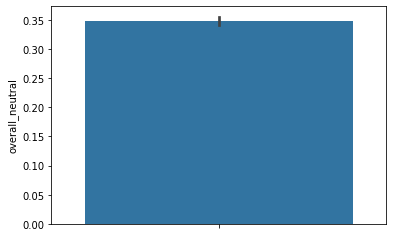

In [992]:
sns.barplot(y=merged['overall_neutral'])

Now we are analyzing the total number of the retweets.

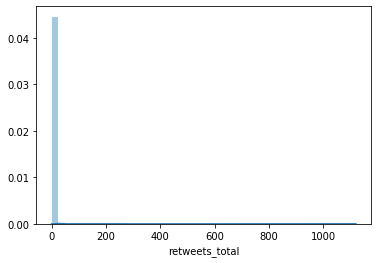

In [993]:
sns.distplot(merged['retweets_total'])

Not very informative, we can see only that most of values were 0 and there are also some outliers in our dataset. Let's then create a barplot instead to see the average of retweets. 

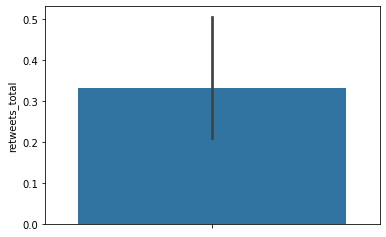

In [855]:
sns.barplot(y=merged['retweets_total'])

The average rate of the retweets is about 0.33.

To see the relations between variable we are making the bivariate visualization.

First, let's explore the relations between negative tweets and amount of retweets they received.

Even though we consider the scatter plot as not appropriate visualization, given that our independent variable (overall_negative)is not continious, but binary, so it is not possible for the tweet to be, for instance, 0.2 negative. However, we would like to see how the data is distributed and whether there is a relation between two variables. So for the sake of curiosity let's do so. 

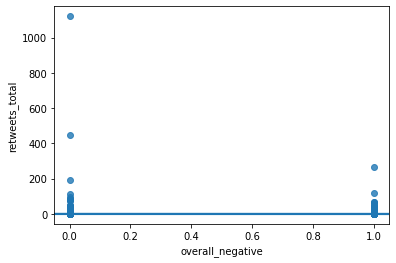

In [994]:
sns.regplot(x='overall_negative', y='retweets_total', data=merged)

The scatter plot shows no relations between the negativity of the tweets and the number of retweets. Once again we see outliers in retweets, but as it was discussed above we do not see the sense of getting rid of them. However, to justify this decision once again let's cut them out and see if it would make a difference.

In the scatter plot above we see that the most outrageous outliers are those tweets that got more than 190 retweets. So let's exclude them from our data and see if that will change the overall picture.

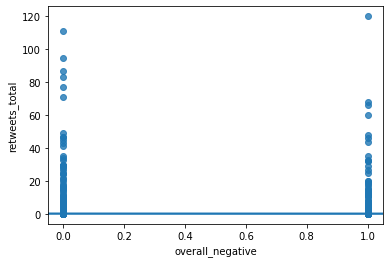

In [995]:
sns.regplot(x='overall_negative', y='retweets_total', data=merged[merged.retweets_total < 190])

So once again we see, that the data is very unevenly distributed and there are a lot of values that are far from the mean. This approach doesn't seem very fitting.

Bearing that in mind let's create a barplot for overall negative/retweets total relations.

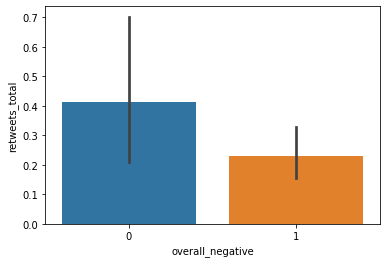

In [996]:
sns.barplot(x='overall_negative', y='retweets_total', data=merged)

And for overall positive/retweets total relations.

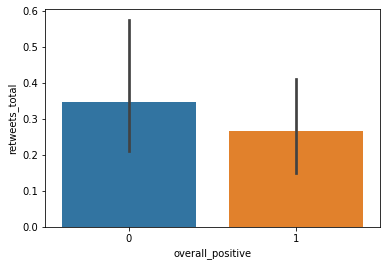

In [997]:
sns.barplot(x='overall_positive', y='retweets_total', data=merged)

Once again we see from the visualization that overall positive tweets gained slightly more retweets than overall negative. However, we would like to make more demonstrative visualization showing simultaneously relations between overall negative, overall positive and the number of retweets they got. For this purpose, using information from Stack Overflow, lets create a new column, that would contain information about positivity (1) and negativity (0) of tweets excluding neutral tweets. We will use this data set only to show the visualization. Later in our analysis we will stick to the 'merged' file.

In [998]:
sentimental = merged[merged.overall_sentiment != 0]
sentimental['ispositive']=  sentimental['overall_sentiment'] > 0
sentimental['ispositive']=sentimental.ispositive.astype(int)

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [861]:
sentimental.head()

,id,text,negative,positive,neutral,retweets_total,overall_sentiment,is_retweet,overall_negative,overall_positive,overall_neutral,ispositive
0,1238382160110931968,the top Democrat on the HELP Committee — to co...,-4,1,-1,0.000,-3,0,1,0,0,0
6,1238382374863265792,Mfs always depending on the government to save...,-3,2,-1,0.000,-1,0,1,0,0,0
11,1238382436943159296,@RightWingWatch And suspend rights. Send Democ...,-2,1,-1,0.000,-1,0,1,0,0,0
12,1238382487379861505,@retropianlove @ProudResister We're staying ho...,-3,2,-1,0.000,-1,0,1,0,0,0
17,1238382567360827394,@RepLeeZeldin Don't pay any attention to the F...,-2,1,-1,0.000,-1,0,1,0,0,0


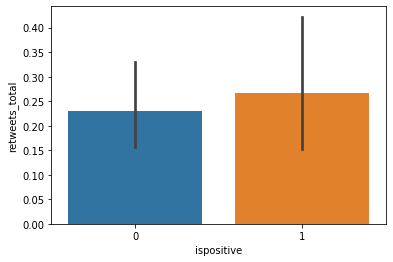

In [999]:
sns.barplot(x='ispositive', y='retweets_total', data=sentimental)

Overall, the bar plot could speak of the certain trend in the data, namely, that positive tweets have higher retweet rate, but the overlapping confidence intervals make this results statistically insignificant.

# Moddeling and Hypothesis Testing

To test our hypothesis and statistical significance we choose to use the linear regression given that our dependent variables (overall positive, overall negative) are continuous.

To test the difference between the negative and positive tweets we need to keep one of the mutially exclusive categories in terms of sentiments out of the model (let it be positive), so that is why we need to include 'neutral' in the model. So any results we will get from the model will be compared to overall_positive tweets, that are out of the model.

In [1000]:
ols_stat = sm.OLS(merged['retweets_total'], sm.add_constant(merged[['overall_negative', 'overall_neutral']]))

C:\Users\1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1001]:
result_ols = ols_stat.fit()

In [1002]:
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:         retweets_total   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.310
Date:                Mon, 23 Mar 2020   Prob (F-statistic):              0.270
Time:                        23:28:41   Log-Likelihood:                -63164.
No. Observations:               16998   AIC:                         1.263e+05
Df Residuals:                   16995   BIC:                         1.264e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2671      0.171  

The used model appeared to be very poorly fitting since R-squared and Adj. R-squared equal zero and P-values greater than 0.05, that makes the results insignificant and shows no relations between positivity/negativity of the tweets and the number of retweets. More detailed discussion of the results read under the 'Evaluation' section.

We would like also run the machine learning model for the 
predictive analytics below. 

# Using machine learning to predict cases

In [1003]:
ols_clf = LinearRegression(fit_intercept = True)

In [1004]:
ols_clf.fit(merged[['negative', 'positive']], merged['retweets_total'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

By running this model we would like to predict how many retweets the tweet could have if being negative.

In [1005]:
ols_clf.predict([[1,0]])

array([0.24105358])

Likewise for the positive tweet.

In [929]:
ols_clf.predict([[0,1]])

array([0.31841706])

And if the tweet is not negative nor positive.

In [604]:
ols_clf.predict([[0,0]])

array([0.05919746])

Read the discussion of the results under the 'Evaluation' section.

We can also change the comparative element, however, the new model theoretically should not work as well since we just change the 'places' of the variables. Let's see.

In [1006]:
ols_stat = sm.OLS(merged['retweets_total'], sm.add_constant(merged[['overall_negative', 'overall_positive']]))

C:\Users\1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1008]:
result_ols = ols_stat.fit()

In [1009]:
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:         retweets_total   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.310
Date:                Mon, 23 Mar 2020   Prob (F-statistic):              0.270
Time:                        23:29:48   Log-Likelihood:                -63164.
No. Observations:               16998   AIC:                         1.263e+05
Df Residuals:                   16995   BIC:                         1.264e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4992      0.129  

The results are not statistically significant as well.

We can also include the control variable in the model to see if it will change the relations between the negative/positive tone and the number of retweets. We will use 'from_user_friendcount' justifying it by the fact that the more popular Tweeter users (with the higher number of friends) could get more retweets due to the greater exposure of their tweets to the online audience.

In [1010]:
ols_stat = sm.OLS(merged['retweets_total'], sm.add_constant(merged[['from_user_friendcount', 'overall_negative', 'overall_neutral']]))

In [1011]:
result_ols = ols_stat.fit()

In [1012]:
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:         retweets_total   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     18.36
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           6.88e-12
Time:                        23:29:55   Log-Likelihood:                -63138.
No. Observations:               16998   AIC:                         1.263e+05
Df Residuals:                   16994   BIC:                         1.263e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

Read evaluation pf the results below.

# Evaluation. Summary of the findings and implications to the business problem.

Overall, the conducted analyses showed no statistically significant relations between the positivity or negativity of the tone of the tweets about democrats and the number of the retweets they gained. Therefore, the hypothesis of the current analysis, namely that the negative tweets get more retweets than positive tweets about democrats, was not supported. 
However, based on the results of the visualization of relations between positive/negative tweets and the number of retweets they received we could make some preliminary assumptions regarding the inspected data set (see the visualization below).

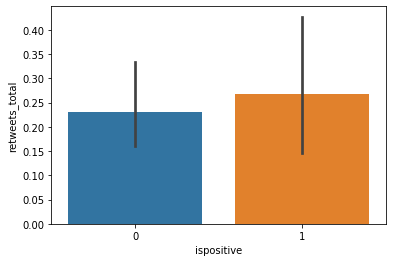

In [1014]:
sns.barplot(x='ispositive', y='retweets_total', data=sentimental)

Overall, the conducted analyses showed no statistically significant relations between the positivity or negativity of the tone of the tweets about democrats and the number of the retweets they gained. Therefore, the hypothesis of the current analysis, namely that the negative tweets get more retweets than positive tweets about democrats, was not supported. 
However, based on the results of the visualization of relations between positive/negative tweets and the number of retweets they received we could make some preliminary assumptions regarding the inspected data set (see the visualization above).

Specifically, we could contemplate, that there could be a certain trend in the relations between emotionality of the tweets and the number of time they got retweeted, namely the positive tweets gained more retweets than negative (roughly around 0.25 against 0.022 respectively). However, the visualization also shows that the confidence intervals of two groups overlap, that makes the results insignificant. We could assume that the greater sample size of the tweets (see the Limitations and Other Steps section) could change the confident intervals and lead to statistical significance of the results, but based on the scrutinized data we could not be sure that that will come true and, therefore, we leave it as an assumption only.

The similar tendency in data was showed by predictive analytics using machine learning. According to the predictions, positive tweet would have on average 0.074 retweets against 0.068 for negative. Meanwhile neutral tweet has the lowest among other categories predicted amount of retweets — 0.059 However, it could be true only for the given data set since the linear regression model shows no statistical significance or no correlation between the tone of the tweet and the retweets. P values for both categories were greater than 0.05 and R-squared appeared to be 0. 

Same results were showed after running the second model — those observations mean that the tried models are poorly fitting and the variables we used have no statistically significant correlation with the number of retweets. Nevertheless, we created another model with a control variable 'from_user_friendcount' the results were significant (P-value = 0.000, although with a very low R-squared - 0.003), but it  showed a very little effect of this variable.

# Limitations and Next Steps

Relatively small sample size of retweets could be considered as one of the limitations of this work. For approximately 17,000 tweets we have relatively low retweet rate ‒ overall about 740 tweets. We can only assumed that one of the reasons of it could be that a lot of tweets were generated by so called ‘Twitter’ bots – the software that could autonomously acts as an ordinary users and being able to tweet, retweet, follow, unfollowing, and even  message other users. We initially thought that this kind of Twitter ids would have smaller number of friends and therefore lesser (or 0) number of retweets.

We tried to address this issue by using the 'from_user_friendcount' variable. We assumed that those users with the greater friend lists could have a greater effect over others, but we should admit, that it is not necessarily true. One should emphasize that Twitter bots acting as users could potentially also have a large online ‘bots’ friends circle since they can follow each other.

Another limitation we had was the fact that some of the initial tweets was reposted from the media channels, such as CNN, that change the nature of the tweet and possible could be eliminated. 

Overall, the next step in trying to find what influences users to retweets the particular tweets we would try to identify if the tweet was tweeted by the real person of by the bots, although it is a tremendously complicated task to fulfill. 

Overall, for the further analysis other variables could be examined to find what factor influences the number of times the tweet got retweeted. Namely, it could be, for example, the location (in one state democrats are more popular than others) or number of likes of dislikes (that makes the messages more popular) of the initial tweets received. To support such hypotheses the relevant academic literature should be reviewed.


# Ethical, Privacy and Normative Considerations

While working with the data there are some ethical considerations that the organization should have. One of the most important ethical issues while working with the social media data is the privacy intervention as well as the ownership of the digital data, according to Neil Lawrence (2015). Even though the concept of privacy is notoriously difficult to define and fix (Finn and Wadhwa, 2014) it could be the real issue in our case. The data that we use for the analysis could enable to identify the real users given that we have a location information in our data set and a lot of users on Twitter use real names and pictures, that all bear a treat to the anonymity of people. 

Moreover, such data is being used without the consent of the Tweeter users to whom that data relates, that arises the issue of transparency, where users are explicitly notified about the usage of their data. Such privacy intervention could provoke outrage from those who have been (or might have been) the targets of the intervention without prior consent (Shah et al., 2015).

As for the users of the data analysis they should be aware of the issue of voters manipulation should be considered. Based on the sentiment analysis results individuals could become the objects of personalized advertising (Finn and Wadhwa, 2014). If following the given recommendation any correlation between sentiment and other variables from the data set could be established it could be used even to manipulate the individuals’ sentiments without their understanding (Finn and Wadhwa, 2014). 

Profiling and segmentation are another serious issue with regards to the big data collection and usage, that is widely discussed in academia and professional circles. Profiling, according to Wigan and Clarke (2013), implies inferring from existing data holdings a set of characteristics for a particular category of person, with the intention of singling out other individuals who closely fit that set of characteristics. That could lead to exercise of preexisting biases for,
and particularly against, racial, ethnic, religious, and socioeconomic stereotypes (Wigan and Clarke, 2013).
Moreover, segmentation leads to bigger social inequality when, specifically in our example, political debate can become limited as campaigns direct their strategies to particular voters, while ignoring less powerful and influencing part of the electorate (Kreiss and Howard, 2010). Segmentation also jeopardizes the diversity of the people’s choice since the users are being exposed to a certain information according to their ‘customer group’ assigned based on digital data analysis. That makes their choice restricted and even nor fully informed.

More broader, segmentation of the audience could threaten the participatory democracy by excluding the niche group (as outliers or those who are far from the mean in the analyzed data set) from the public sphere, that should be also taken in consideration by the users of the digital data analysis results. Thus, as stated by Harper (2017), the generalized result of digital data analysis would lead to hegemony of majority and lack of pluralism.


# Bibliography

Damstra, A., & Boukes, M.(2018). The Economy, the News, and the Public: A Longitudinal Study of the Impact of Economic News on Economic Evaluations and Expectations. Communication Research, 1-25.

Finn, R. L., & Wadhwa, K. (2014). The ethics of “smart” advertising and regulatory initiatives in the consumer intelligence industry. info.

Harper, T. (2017). The big data public and its problems: Big data and the structural transformation of the public sphere. New Media & Society, 19(9), 1424-1439.

Kreiss, D., & Howard, P. N. (2010). New challenges to political privacy: Lessons from the first US Presidential race in the Web 2.0 era. International Journal of Communication, 4, 19.

Lawrence, N. (2015, March 5). Beware the rise of the digital oligarchy. Retrieved from The Guardian: https://www.theguardian.com/media-network/2015/mar/05/digital-oligarchy-algorithms-personal-data

Richards, B. (2004). The emotional deficit in political communication. Political Communication, 21(3), 339-352.

Shah, D. V., Cappella, J. N., & Neuman, W. R. (2015). Big data, digital media, and computational social science: Possibilities and perils. The ANNALS of the American Academy of Political and Social Science, 659(1), 6-13.

Soroka, S. (2006). Good News and Bad News: Asymmetric Responses to Economic Information. The Journal of Politics, 68(2), 372-385.

Tetlock, P. C. (2007). Giving content to investor sentiment: The role of media in the stock market. The Journal of finance, 62(3), 1139-1168.

Wigan, M. R., & Clarke, R. (2013). Big data's big unintended consequences. Computer, 46(6), 46-53.